# Hand Gesture Recognition And Modification

## Model for classifying Rock, Paper, and Scissors Dataset

### Importing Required Modules/Packages

In [1]:

#Required Imports
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Augmentation & PreProcessing

In [2]:
#Assigning the path for all the Directories
train_dir='.\Dataset-final\Train'
test_dir='.\Dataset-final\Test'
valid_dir='.\Dataset-final\Validation'

In [3]:

#Using Keras ImageDataGenerator function for Data Augmentation
training_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(train_dir, target_size=(150,150), class_mode='categorical', batch_size=32)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(valid_dir, target_size=(150,150), class_mode='categorical', batch_size=32)

Found 1575 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


### Creating Model

In [4]:
#Creating Model using Tensorflow
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
   
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        3

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Training Model

In [6]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=19)


Train for 50 steps, validate for 19 steps
Epoch 1/100
50/50 [==============================] - 86s 2s/step - loss: 1.1226 - accuracy: 0.3225 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/100
50/50 [==============================] - 85s 2s/step - loss: 1.1067 - accuracy: 0.3340 - val_loss: 1.0994 - val_accuracy: 0.3283
Epoch 3/100
50/50 [==============================] - 86s 2s/step - loss: 1.0995 - accuracy: 0.3556 - val_loss: 1.0978 - val_accuracy: 0.3283
Epoch 4/100
50/50 [==============================] - 84s 2s/step - loss: 1.0952 - accuracy: 0.3613 - val_loss: 1.1901 - val_accuracy: 0.3367
Epoch 5/100
50/50 [==============================] - 83s 2s/step - loss: 1.1017 - accuracy: 0.3448 - val_loss: 1.1028 - val_accuracy: 0.3500
Epoch 6/100
50/50 [==============================] - 83s 2s/step - loss: 1.0971 - accuracy: 0.3594 - val_loss: 1.1289 - val_accuracy: 0.2867
Epoch 7/100
50/50 [==============================] - 87s 2s/step - loss: 1.0991 - accuracy: 0.3759 - val_loss: 1

### Plotting Loss and Accuracy

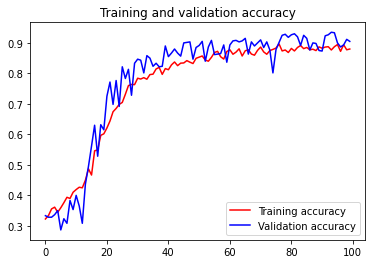

<Figure size 432x288 with 0 Axes>

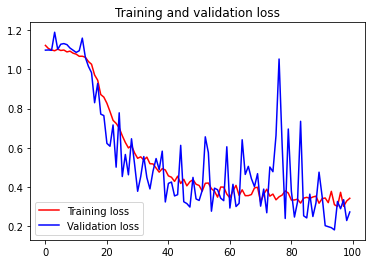

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Testing the Model's Perfomance

In [9]:
#Testing Model 
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test_dir, batch_size=32, class_mode='categorical', target_size=(150,150))
model.evaluate(test_generator, steps=7)

Found 210 images belonging to 3 classes.
7/7 [==============================] - 8s 1s/step - loss: 0.2466 - accuracy: 0.9190


[0.2466221803000995, 0.9190476]

### Saving the Model

In [11]:
model.save("model_saved.h5")